In [6]:
import sys
from pathlib import Path
import numpy as np
import sys
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Ensure project root is in sys.path
project_root = Path.cwd().parent  # parent of "notebooks"
sys.path.insert(0, str(project_root))

print("Project root:", project_root)
print("ts_boilerplate exists:", (project_root / "ts_boilerplate").exists())
from ts_boilerplate.simpledataprep import simple_prepare_dataset

Project root: /Users/arnaudthomas/code/bennystu/Trend-Surgeon/Trend-Surgeon-Time-Series
ts_boilerplate exists: True


In [2]:
TICKER = "PPH"
START  = "2014-01-01"
END    = "2024-12-31"
HORIZON = 30  # predict 30 days into the future

In [3]:
X_train, y_train, X_test, y_test = simple_prepare_dataset(
    ticker=TICKER,
    start=START,
    end=END,
    horizon=HORIZON,
    for_rnn=False     # we want XGBoost
)

print("Training features:", X_train.shape)
print("Test features:", X_test.shape)

/Users/arnaudthomas/code/bennystu/Trend-Surgeon/Trend-Surgeon-Time-Series/ts_boilerplate/simpledataprep.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Training features: (3181, 12)
Test features: (796, 12)


In [4]:
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror",
    random_state=42
)

model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE :", mae)

RMSE: 11.452846772678322
MAE : 9.081716465590587


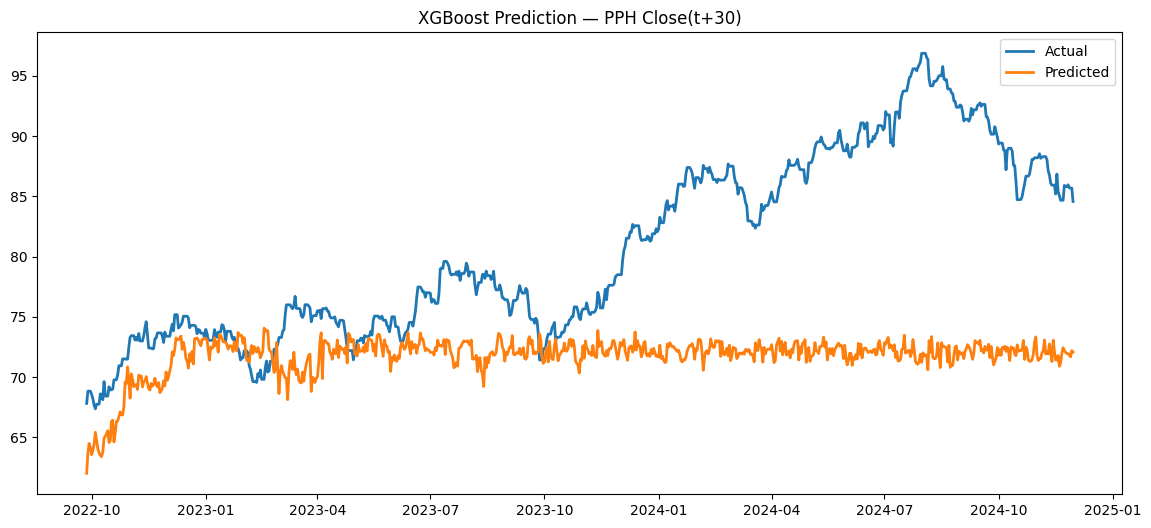

In [9]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label="Actual", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicted", linewidth=2)
plt.title(f"XGBoost Prediction — {TICKER} Close(t+{HORIZON})")
plt.legend()
plt.show()

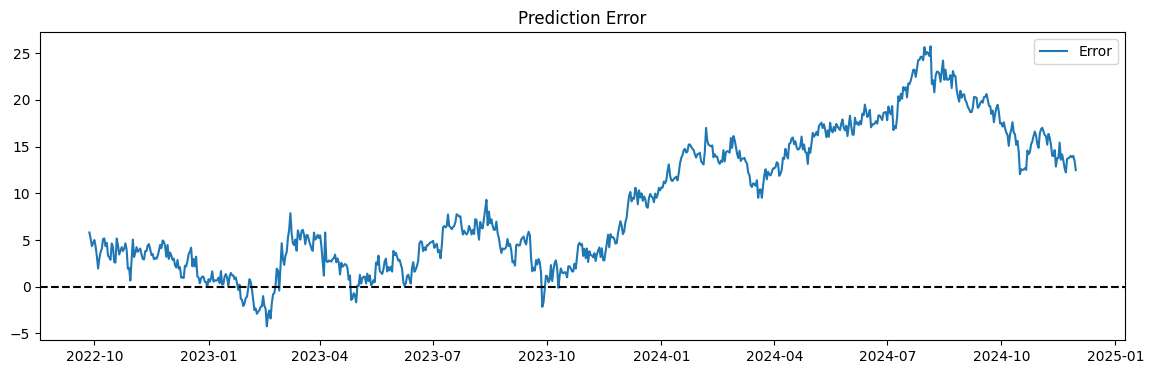

In [10]:
plt.figure(figsize=(14,4))
plt.plot(y_test.index, y_test.values - y_pred, label="Error")
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Error")
plt.legend()
plt.show()
